In [10]:
import pandas as pd
import datetime

In [2]:
bike = pd.read_csv('/notebooks/bike.tar.bz2',index_col=0)

In [3]:
bike['Start Date'] = bike['Start Date'].astype('datetime64[ns]')

In [4]:
bike.head()

,Duration,Bike Id,End Date,EndStation Id,Start Date,StartStation Id
bike.tar.bz2,,,,,,
83284852.0,660.0,8282.0,02/01/2019 17:47,94.0,2019-02-01 17:36:00,197.0
83360769.0,180.0,4657.0,06/01/2019 18:14,94.0,2019-06-01 18:11:00,269.0
83280311.0,960.0,6306.0,02/01/2019 14:49,374.0,2019-02-01 14:33:00,5.0
83323626.0,120.0,6217.0,04/01/2019 12:54,269.0,2019-04-01 12:52:00,94.0
83343322.0,120.0,848.0,05/01/2019 16:03,269.0,2019-05-01 16:01:00,94.0


In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 31259721 entries, 83284852.0 to nan
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Duration         float64       
 1   Bike Id          float64       
 2   End Date         object        
 3   EndStation Id    float64       
 4   Start Date       datetime64[ns]
 5   StartStation Id  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1.6+ GB


In [8]:
%%time
# time-related
bike_time = bike.copy()
bike_time['HourofDay'] = bike_time['Start Date'].dt.hour
bike_time['DayofWeek'] = bike_time['Start Date'].dt.day_of_week
bike_time['DayofYear'] = bike_time['Start Date'].dt.day_of_year
bike_time['Month'] = bike_time['Start Date'].dt.month
bike_time['Season'] = bike_time['Start Date'].dt.quarter
bike_time['Year'] = bike_time['Start Date'].dt.year
bike_time['1s'] = [1]*bike_time.shape[0]
bike_time['Duration'] = bike_time['Duration']/60
bike_time.head()

CPU times: user 32.3 s, sys: 2.95 s, total: 35.3 s
Wall time: 35.2 s


,Duration,Bike Id,End Date,EndStation Id,Start Date,StartStation Id,HourofDay,DayofWeek,DayofYear,Month,Season,Year,1s
bike.tar.bz2,,,,,,,,,,,,,
83284852.0,11.0,8282.0,02/01/2019 17:47,94.0,2019-02-01 17:36:00,197.0,17.0,4.0,32.0,2.0,1.0,2019.0,1
83360769.0,3.0,4657.0,06/01/2019 18:14,94.0,2019-06-01 18:11:00,269.0,18.0,5.0,152.0,6.0,2.0,2019.0,1
83280311.0,16.0,6306.0,02/01/2019 14:49,374.0,2019-02-01 14:33:00,5.0,14.0,4.0,32.0,2.0,1.0,2019.0,1
83323626.0,2.0,6217.0,04/01/2019 12:54,269.0,2019-04-01 12:52:00,94.0,12.0,0.0,91.0,4.0,2.0,2019.0,1
83343322.0,2.0,848.0,05/01/2019 16:03,269.0,2019-05-01 16:01:00,94.0,16.0,2.0,121.0,5.0,2.0,2019.0,1


In [11]:
bike_time['Date'] = bike_time['Start Date'].dt.date

date = datetime.date(2019,2,1)
data_oneDay = bike_time[bike_time['Date']==date]
data_oneDay.sort_values(by='Start Date')

,Duration,Bike Id,End Date,EndStation Id,Start Date,StartStation Id,HourofDay,DayofWeek,DayofYear,Month,Season,Year,1s,Date
bike.tar.bz2,,,,,,,,,,,,,,
83270161.0,10.0,777.0,02/01/2019 00:10,631.0,2019-02-01 00:00:00,368.0,0.0,4.0,32.0,2.0,1.0,2019.0,1,2019-02-01
83270163.0,12.0,150.0,02/01/2019 00:13,258.0,2019-02-01 00:01:00,248.0,0.0,4.0,32.0,2.0,1.0,2019.0,1,2019-02-01
83270162.0,13.0,2426.0,02/01/2019 00:14,258.0,2019-02-01 00:01:00,248.0,0.0,4.0,32.0,2.0,1.0,2019.0,1,2019-02-01
83270167.0,9.0,1159.0,02/01/2019 00:12,298.0,2019-02-01 00:03:00,230.0,0.0,4.0,32.0,2.0,1.0,2019.0,1,2019-02-01
83270169.0,22.0,11063.0,02/01/2019 00:25,169.0,2019-02-01 00:03:00,733.0,0.0,4.0,32.0,2.0,1.0,2019.0,1,2019-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83290533.0,31.0,2757.0,03/01/2019 00:30,303.0,2019-02-01 23:59:00,303.0,23.0,4.0,32.0,2.0,1.0,2019.0,1,2019-02-01
83290531.0,7.0,1093.0,03/01/2019 00:06,78.0,2019-02-01 23:59:00,215.0,23.0,4.0,32.0,2.0,1.0,2019.0,1,2019-02-01
83290532.0,5.0,2839.0,03/01/2019 00:04,242.0,2019-02-01 23:59:00,239.0,23.0,4.0,32.0,2.0,1.0,2019.0,1,2019-02-01


In [12]:
# Isolate outgoing and incoming bikes at a specific station
outgoing = data_oneDay[data_oneDay['StartStation Id']==215]
# outgoing = outgoing.sort_values(by='Start Date')
incoming = data_oneDay[data_oneDay['EndStation Id']==215]
# incoming = incoming.sort_values(by='End Date')

In [13]:
# This trick is used to go through departure/arrival times of bikes at station
incoming['Start Date'] = incoming['End Date']
incoming['Start Date'] = incoming['Start Date'].astype('datetime64[ns]')

/tmp/ipykernel_32/1529901054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incoming['Start Date'] = incoming['End Date']
/tmp/ipykernel_32/1529901054.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incoming['Start Date'] = incoming['Start Date'].astype('datetime64[ns]')


In [14]:
# Merge incoming/outgoing bike movements to go through one by one
movements = pd.concat([outgoing,incoming],axis=0)
movements = movements.sort_values(by='Start Date')

In [15]:
max_bikes = 52 # according to 'https://santandercycles.tfl.gov.uk/map'
remain_bikes = []
current_bikes = 2

for index, row in movements.iterrows():
    if row['StartStation Id']==215.0:
        # print(row['StartStation Id'])
        current_bikes -= 1
        remain_bikes.append((row['Start Date'],current_bikes))
    elif row['EndStation Id']==215.0:
        current_bikes += 1
        remain_bikes.append((row['Start Date'],current_bikes))
remain = [ele[1] for ele in remain_bikes]

print('The maximum gap for bikes throughout the day could be anything from', 0,'to', max_bikes-max(remain))

The maximum gap for bikes throughout the day could be anything from 0 to 14


In [20]:
bike_time.shape

(31259721, 14)

In [16]:
# Pick date and track movements within the hours of that day
withinDay = pd.DataFrame()
withinDay['Total Hourly Count'] = bike_time.groupby('HourofDay')['1s'].sum()
stations_id = bike_time.groupby('EndStation Id')['1s'].sum().index

for station in stations_id:
    station_name = str('StartStation Id ') + str(station)
    withinDay[station_name] = bike_time[bike_time['StartStation Id']==station].groupby('HourofDay')['1s'].sum()
    
withinDay.head()   

/tmp/ipykernel_32/618920040.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  withinDay[station_name] = bike_time[bike_time['StartStation Id']==station].groupby('HourofDay')['1s'].sum()
/tmp/ipykernel_32/618920040.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  withinDay[station_name] = bike_time[bike_time['StartStation Id']==station].groupby('HourofDay')['1s'].sum()
/tmp/ipykernel_32/618920040.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

,Total Hourly Count,StartStation Id 1.0,StartStation Id 2.0,StartStation Id 3.0,StartStation Id 4.0,StartStation Id 5.0,StartStation Id 6.0,StartStation Id 7.0,StartStation Id 8.0,StartStation Id 9.0,...,StartStation Id 834.0,StartStation Id 835.0,StartStation Id 836.0,StartStation Id 838.0,StartStation Id 839.0,StartStation Id 840.0,StartStation Id 841.0,StartStation Id 842.0,StartStation Id 844.0,StartStation Id 845.0
HourofDay,,,,,,,,,,,,,,,,,,,,,
0.0,319239,153,338,195,288,578,320,208,450,498,...,439,188,381,77,595,190,192,471,177,120
1.0,205813,87,186,136,248,228,153,150,282,268,...,213,162,368,82,491,154,144,391,143,63
2.0,126310,51,116,119,138,139,89,66,134,179,...,108,124,352,42,231,84,95,213,164,52
3.0,85920,24,68,46,105,71,156,64,87,78,...,74,87,334,20,114,56,61,144,87,33
4.0,72774,34,46,23,66,43,126,28,97,53,...,125,65,687,18,66,93,30,145,30,22


In [18]:
total_day = withinDay['Total Hourly Count']


(24, 805)

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='HourofDay', ylabel='Total Hourly Count'>

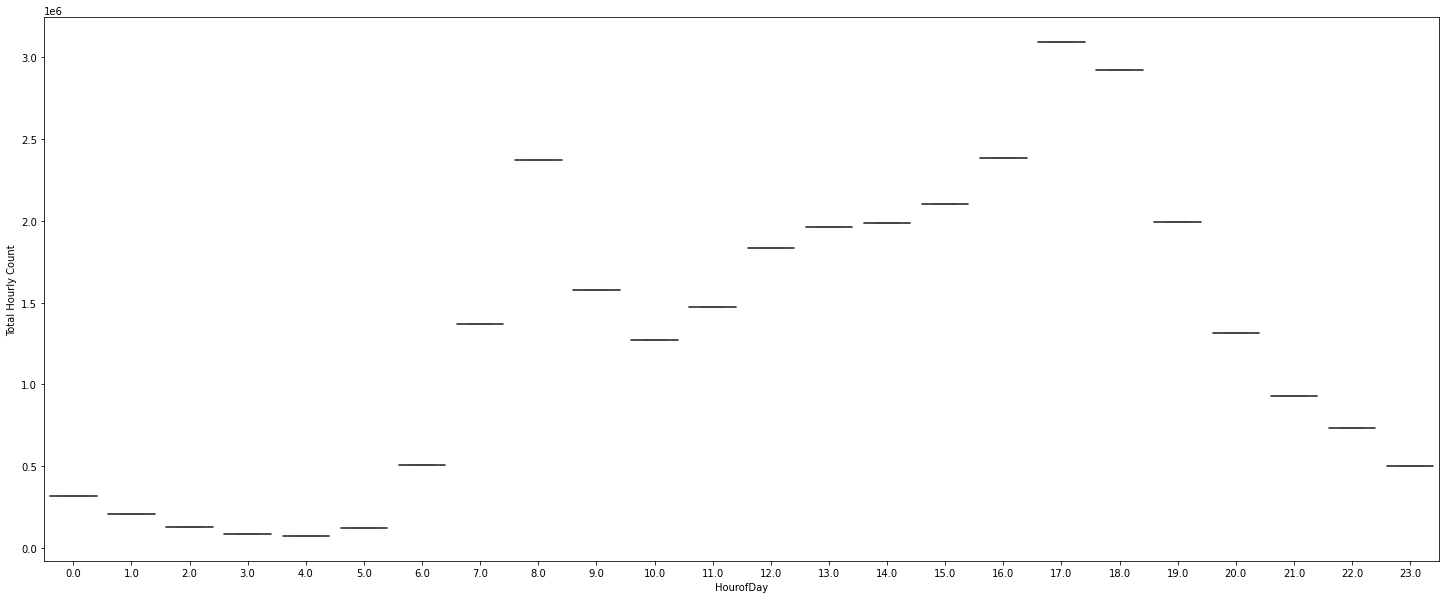

In [30]:
plt.figure(figsize=(25, 10))
sns.boxplot(x=withinDay.index,y='Total Hourly Count',data=withinDay)

In [32]:
bike_time.columns

Index(['Duration', 'Bike Id', 'End Date', 'EndStation Id', 'Start Date',
       'StartStation Id', 'HourofDay', 'DayofWeek', 'DayofYear', 'Month',
       'Season', 'Year', '1s', 'Date'],
      dtype='object')

In [31]:
# get distribution of hourly counts over 3 years, instead of sum
bike_time.head()

,Duration,Bike Id,End Date,EndStation Id,Start Date,StartStation Id,HourofDay,DayofWeek,DayofYear,Month,Season,Year,1s,Date
bike.tar.bz2,,,,,,,,,,,,,,
83284852.0,11.0,8282.0,02/01/2019 17:47,94.0,2019-02-01 17:36:00,197.0,17.0,4.0,32.0,2.0,1.0,2019.0,1,2019-02-01
83360769.0,3.0,4657.0,06/01/2019 18:14,94.0,2019-06-01 18:11:00,269.0,18.0,5.0,152.0,6.0,2.0,2019.0,1,2019-06-01
83280311.0,16.0,6306.0,02/01/2019 14:49,374.0,2019-02-01 14:33:00,5.0,14.0,4.0,32.0,2.0,1.0,2019.0,1,2019-02-01
83323626.0,2.0,6217.0,04/01/2019 12:54,269.0,2019-04-01 12:52:00,94.0,12.0,0.0,91.0,4.0,2.0,2019.0,1,2019-04-01
83343322.0,2.0,848.0,05/01/2019 16:03,269.0,2019-05-01 16:01:00,94.0,16.0,2.0,121.0,5.0,2.0,2019.0,1,2019-05-01


In [36]:
import numpy as np

In [ ]:
bike_time.groupby('Date')[bike_time.columns].apply(lambda x: np.unique(x))